In [3]:
import pandas as pd

In [9]:
data = pd.read_csv('dbs_singdollar.csv')

In [11]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    122 non-null    object 
 1   DBS     122 non-null    float64
 2   SGD     122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [14]:
data.describe()

,DBS,SGD
count,122.000000,122.000000
mean,19.055410,1.406558
std,1.092625,0.017629
min,17.070000,1.375950
25%,18.437500,1.395015
50%,18.760000,1.404165
75%,20.427500,1.417855
max,21.040000,1.450180


In [15]:
data.isna().sum()

Date    0
DBS     0
SGD     0
dtype: int64

<AxesSubplot:>

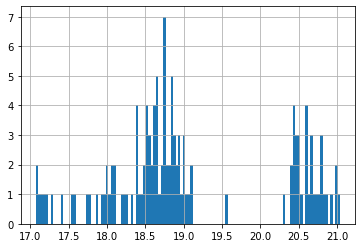

In [19]:
data['DBS'].hist(bins=122)

<AxesSubplot:>

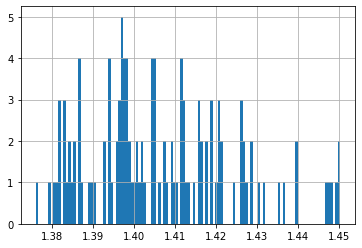

In [20]:
data['SGD'].hist(bins=122)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X = data.loc[:,["SGD"]]
y = data.loc[:,["DBS"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
y_preds = lr.predict(X_test)

In [52]:
print(r2_score(y_preds,y_test))

0.5399780627453661


In [55]:
print(mean_squared_error(y_preds,y_test))

0.4429385454992426


In [56]:
#rmse
print(mean_squared_error(y_preds,y_test)**0.5)

0.6655362841342631


In [59]:
import joblib
joblib.dump(lr,'dbs_linear_model')

['dbs_linear_model']

In [46]:
data['Date']

0       6/20/2017
1       6/19/2017
2       6/16/2017
3       6/15/2017
4       6/14/2017
          ...    
117    12/30/2016
118    12/29/2016
119    12/28/2016
120    12/27/2016
121    12/23/2016
Name: Date, Length: 122, dtype: object

In [41]:
data.dtypes

Date     object
DBS     float64
SGD     float64
dtype: object

In [40]:
data.sort_values('Date',ascending=False)

,Date,DBS,SGD
7,6/9/2017,20.72,1.38401
8,6/8/2017,20.47,1.38270
9,6/7/2017,20.43,1.38187
10,6/6/2017,20.49,1.37925
11,6/5/2017,20.49,1.38157
...,...,...,...
107,1/16/2017,18.06,1.43030
108,1/13/2017,18.05,1.42592
109,1/12/2017,17.86,1.42728
110,1/11/2017,17.78,1.42678


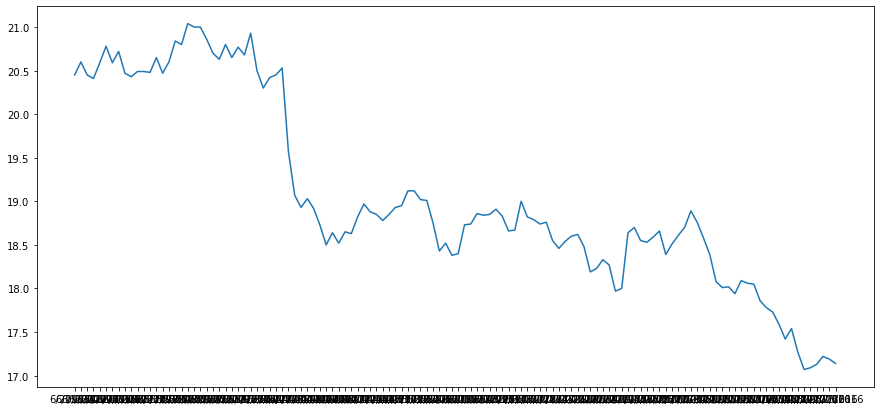

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(data['Date'],data['DBS'])
plt.show()

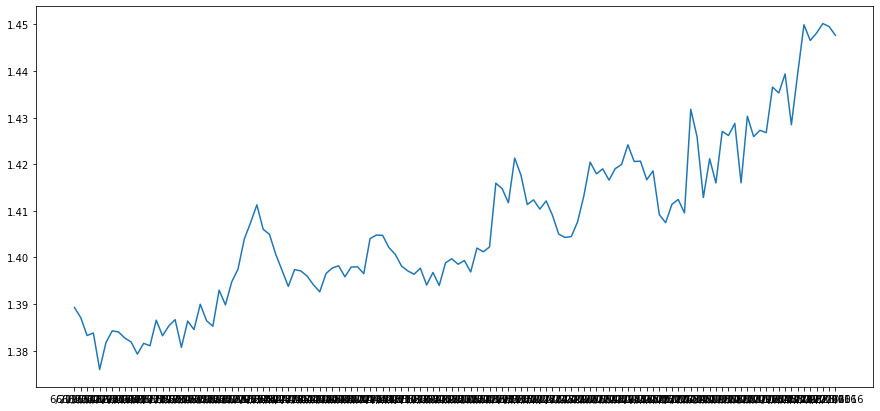

In [36]:
plt.figure(figsize=(15,7))
plt.plot(data['Date'],data['SGD'])
plt.show()